Načti data do proměnné X:

In [121]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

Data normalizuj

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
scaler = StandardScaler()
X_reduced = scaler.fit_transform(X)

Redukuj počet vstupních proměnných na dvě pomocí TSNE. Můžeš vyzkoušet různé parametry.

In [124]:
from sklearn.manifold import TSNE

In [125]:
tsne = TSNE(
    init="pca",
    n_components=2,
    perplexity=10,
    learning_rate="auto",
    random_state=0,
)

X_reduced = tsne.fit_transform(X_reduced)

/Users/hedvikapajerova/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Vykresli data do bodového grafu. Kolik odhaduješ shluků (clusterů)?

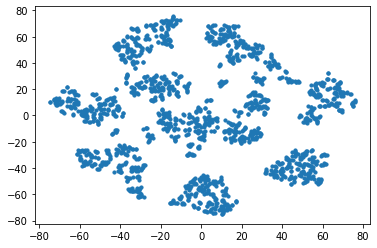

In [126]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=10)

Shluků by mohlo být asi 11 - 15.

Aplikuj algoritmus KMeans s počtem shluků, který jsi odhadl/a v předchozím kroku

In [127]:
from sklearn.cluster import KMeans

In [128]:
model = KMeans(n_clusters=10, random_state=0)
labels = model.fit_predict(X_reduced)

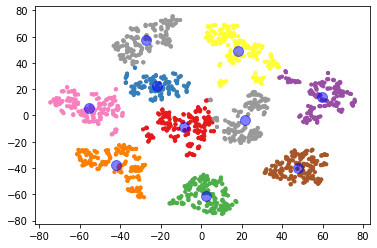

In [129]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, s=10, cmap="Set1")
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="blue", s=100, alpha=0.5)

Vyhodnoť výsledek pomocí silhouette_score, který by měl být alespoň 0.5

In [130]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [131]:
silhouette_score(X_reduced, labels)

0.547613

# Dobrovolný doplněk
Pokud jsi dosud nepátral/a po původu těchto dat, využij nápovědu níže. O jaký typ dat by se mohlo jednat? Zkus nastavovat různé hodnoty proměnné idx, která indexuje řádky původních dat - před redukcí dimenzionality!

Uměli bychom jednotlivé clustery označit? Podle čeho se data shlukují?

In [80]:
import numpy as np
import matplotlib.pyplot as plt

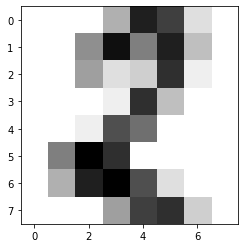

In [141]:
idx = 50
image = np.reshape(X[idx], (8, 8))
plt.imshow(image, cmap="gray_r")

Vypadá to na nějaké znaky, ale vygooglila jsem, že je to databáze ručně psaných číslic.